In [1]:
!pip install -q opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# **Choose a classification dataset and normalize features**

In [3]:
od.download_kaggle_dataset(dataset_url='https://www.kaggle.com/datasets/uciml/iris', data_dir='dataset')

csv_file_path = "/content/dataset/iris/Iris.csv"
data = pd.read_csv(csv_file_path)

data.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joisesarakkal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/iris


100%|██████████| 3.60k/3.60k [00:00<00:00, 3.55MB/s]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Extract features and target
X = data.iloc[:, 1:5].values
y = data["Species"].values

# Encode species labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print("Normalized features shape:", X_scaled.shape)

Normalized features shape: (150, 4)


# **Use KNeighborsClassifier from sklearn**
# **Experiment with different values of K**
# **Evaluate model using accuracy, confusion matrix**

In [5]:
k_values = [1, 3, 5, 7, 9]

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nK={k} Accuracy: {acc:.2f}")
    print("Confusion Matrix:\n", cm)



K=1 Accuracy: 0.93
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]

K=3 Accuracy: 0.91
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

K=5 Accuracy: 0.91
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

K=7 Accuracy: 0.93
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]

K=9 Accuracy: 0.96
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


# **Visualize decision boundaries**

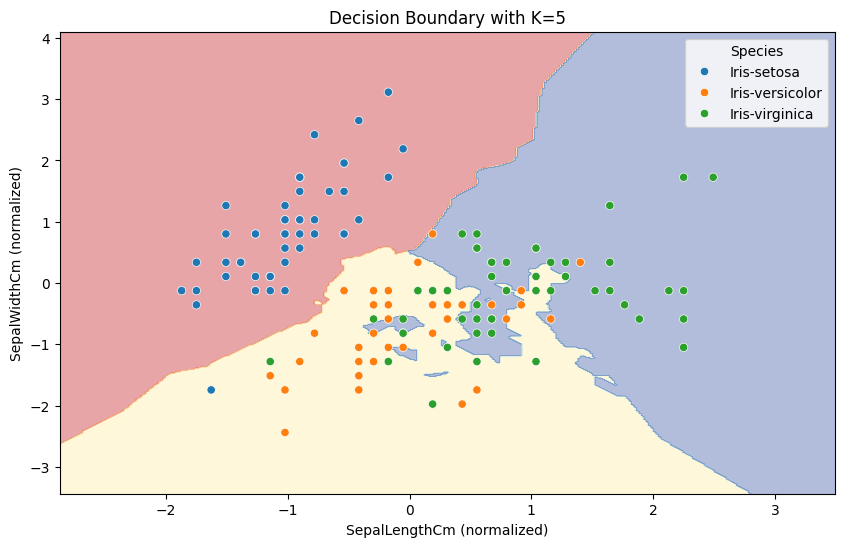

In [6]:
# Using first two features for 2D visualization
X_vis = X_scaled[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_vis, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train2, y_train2)

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=data["Species"])
plt.title("Decision Boundary with K=5")
plt.xlabel("SepalLengthCm (normalized)")
plt.ylabel("SepalWidthCm (normalized)")
plt.show()